<h1><center>CS5710 – Machine Learning</center></h1>
<h2><center>Assignment-2</center></h2>

<div class="alert alert-block alert-success">
    <b> Name:  </b> Teja Gelli </br>
    <b> 700#: </b> 700745495
</div>

### Importing required Modules/libraries for the Assignment

In [36]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
import random as rnd

# loading the warnings module
import warnings
# setting a filter to ignore warnings that gets generated by the code
warnings.filterwarnings("ignore")

# Data Visualization Modules
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning modules
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing

# function is used to split the data into training and testing sets for machine learning modeling
from sklearn.model_selection import train_test_split

# importing functions used to evaluate the performance of machine learning models
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

<div class="alert alert-block alert-info">
    <b><h1>1. Pandas</h1></b>
</div>

### Question 1
<font color='brown'><b>Read the provided CSV file ‘data.csv’. </br>
    
https://drive.google.com/drive/folders/1h8C3mLsso-R-sIOLsvoYwPLzy2fJ4IOF?usp=sharing

In [37]:
# Reading the CSV file using read_csv( ) function
df = pd.read_csv('data.csv')

# Printing the first 5 rows of the DataFrame
df.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


### Question 2
<font color='brown'><b>Show the basic statistical description about the data.

In [38]:
# Getting the basic statistical description about the data
description = df.describe()

# Printing the description
description

,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


### Question 3
<font color='brown'><b>Check if the data has null values.

In [39]:
print('Are there any null values: ', df.isnull().values.any())

# Checking for null values in the DataFrame
null_values = df.isnull().sum()

# Printing the number of null values for each column
null_values

Are there any null values:  True


Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64

    a. Replace the null values with the mean

In [40]:
# Replacing null values with the mean of the respective column
mean_values = df.mean()
df.fillna(mean_values, inplace=True)

print('Are there any null values after replacing: ', df.isnull().values.any())

# Checking for null values in the DataFrame (should return all 0s)
null_values = df.isnull().sum()

# Printing the number of null values for each column
null_values

Are there any null values after replacing:  False


Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64

### Question 4
<font color='brown'><b>Select at least two columns and aggregate the data using: min, max, count, mean.

In [41]:
# Selecting two columns maxpulse, calories and aggregating using min, max, count, and mean
agg_df = df.agg({'Maxpulse': ['min', 'max', 'count', 'mean'],
                 'Calories': ['min', 'max', 'count', 'mean']})

# Printing the aggregated data
agg_df

,Maxpulse,Calories
min,100.000000,50.300000
max,184.000000,1860.400000
count,169.000000,169.000000
mean,134.047337,375.790244


### Question 5
<font color='brown'><b>Filter the dataframe to select the rows with calories values between 500 and 1000.

In [42]:
# Filtering the DataFrame to select rows with calorie values between 500 and 1000
filtered_df = df.loc[(df['Calories'] >= 500) & (df['Calories'] <= 1000)]

# Printing the filtered DataFrame
filtered_df

,Duration,Pulse,Maxpulse,Calories
51,80,123,146,643.1
62,160,109,135,853.0
65,180,90,130,800.4
66,150,105,135,873.4
67,150,107,130,816.0
72,90,100,127,700.0
73,150,97,127,953.2
75,90,98,125,563.2
78,120,100,130,500.4
83,120,100,130,500.0


### Question 6
<font color='brown'><b>Filter the dataframe to select the rows with calories values > 500 and pulse < 100.

In [43]:
# Filtering the DataFrame to select rows with calorie values > 500 and pulse values < 100
filtered_df = df.loc[(df['Calories'] > 500) & (df['Pulse'] < 100)]

# Printing the filtered DataFrame
filtered_df

,Duration,Pulse,Maxpulse,Calories
65,180,90,130,800.4
70,150,97,129,1115.0
73,150,97,127,953.2
75,90,98,125,563.2
99,90,93,124,604.1
103,90,90,100,500.4
106,180,90,120,800.3
108,90,90,120,500.3


### Question 7
<font color='brown'><b>Create a new “df_modified” dataframe that contains all the columns from df except for “Maxpulse”.

In [44]:
# Droping the 'Maxpulse' column and creating a new DataFrame
df_modified = df.drop(columns=['Maxpulse'])

# Printing the first 5 rows of new DataFrame
df_modified.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


### Question 8
<font color='brown'><b>Delete the “Maxpulse” column from the main df dataframe

In [45]:
# Droping the 'Maxpulse' column from the original DataFrame
df.drop(columns=['Maxpulse'], inplace=True)

#printing the modified dataframe
df.head()

,Duration,Pulse,Calories
0,60,110,409.1
1,60,117,479.0
2,60,103,340.0
3,45,109,282.4
4,45,117,406.0


### Question 9
<font color='brown'><b>Convert the datatype of Calories column to int datatype.

In [46]:
# astype() function is used to convert the data type
df['Calories'] = df['Calories'].astype('int64')
df.dtypes

Duration    int64
Pulse       int64
Calories    int64
dtype: object

### Question 10
<font color='brown'><b>Using pandas create a scatter plot for the two columns (Duration and Calories).

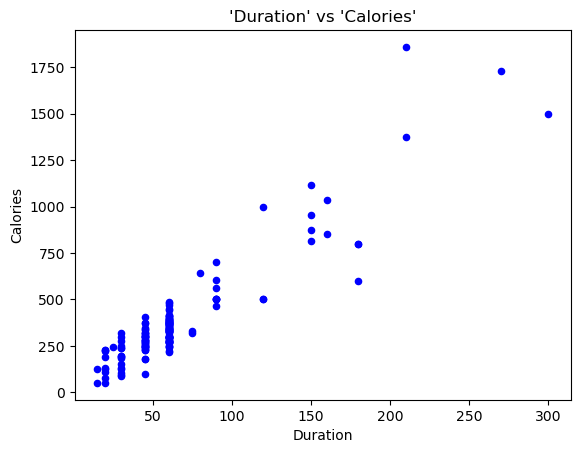

In [47]:
# Creating a scatter plot for 'Duration' vs 'Calories'
df.plot(x = 'Duration',
        y = 'Calories',
        kind = 'scatter',
        title = "'Duration' vs 'Calories'",
        c = 'blue')

# displaying the plot
plt.show()

<div class="alert alert-block alert-info">
    <b><h1>scikit-learn:</h1></b>
</div>

### Question 1
<font color='brown'><b>Implement Naïve Bayes method using scikit-learn library.

    a. Use the glass dataset available in Link also provided in your assignment.

In [48]:
# Loading the dataset
glass_df = pd.read_csv("glass.csv")
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


    b. Use train_test_split to create training and testing part.

In [49]:
x1 = glass_df.iloc[:,:-1].values
y1 = glass_df['Type'].values

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x1, y1, test_size = 0.30, random_state = 0)

### Question 2
<font color='brown'><b>Evaluate the model on testing part using score and

        classification_report(y_true, y_pred)

In [50]:
# GaussianNB()- function creates an instance of the Gaussian Naive Bayes classifier
classifier1 = GaussianNB()

# Training the classifier using the training data
classifier1.fit(x_train, y_train)

# Making predictions on the testing data and storing in y_pred
y_pred = classifier1.predict(x_test)

# generates a confusion matrix that summarizes the number of TP, FP, TN, FN for each class
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# accuracy of the classifier by comparing features (x_test) with true labels (y_test)
print("\n\t Accuracy by score:", classifier1.score(x_test, y_test))

# accuracy of the classifier by comparing the predicted values (y_pred) with true values (y_test)
print('\nAccuracy by accuracy_score:', accuracy_score(y_pred, y_test))

'''generating a summary of the predictions made by the classifier, including precision, 
recall, and F1-score for each class, as well as an overall accuracy score. '''
print('\n',classification_report(y_test, y_pred))

Confusion Matrix:
 [[18  1  0  0  1  1]
 [21  3  1  1  0  0]
 [ 7  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  7]]

	 Accuracy by score: 0.46153846153846156

Accuracy by accuracy_score: 0.46153846153846156

               precision    recall  f1-score   support

           1       0.39      0.86      0.54        21
           2       0.50      0.12      0.19        26
           3       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       0.88      1.00      0.93         7

    accuracy                           0.46        65
   macro avg       0.41      0.50      0.41        65
weighted avg       0.44      0.46      0.37        65



<div class="alert alert-block alert-warning">
    <b> <h3> Implement linear SVM method using scikit library. </h3> </b>
</div>

### Question 1
<font color='brown'><b>Implement linear SVM method using scikit library

    a. Use the glass dataset available in Link also provided in your assignment.
    b. Use train_test_split to create training and testing part.
   

In [51]:
# Loading the dataset
glass_df = pd.read_csv("glass.csv")
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [52]:
x1 = glass_df.iloc[:,:-1].values
y1 = glass_df['Type'].values

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test=train_test_split(x1, y1, test_size = 0.30, random_state = 0)

### Question 2
<font color='brown'><b>Evaluate the model on testing part using score and

        classification_report(y_true, y_pred)

In [53]:
# LinearSVC( ) - function creates an instance of the Linear support vector classifier
classifier2 = LinearSVC(random_state = 1)

# Training the classifier using the training data
classifier2.fit(x_train, y_train)

# Making predictions on the testing data and storing in y_pred
y_pred2 = classifier2.predict(x_test)

# generates a confusion matrix that summarizes the number of TP, FP, TN, FN for each class
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred2))

# accuracy of the classifier by comparing features (x_test) with true labels (y_test)
print("\n\t Accuracy by score:", classifier2.score(x_test, y_test))

# accuracy of the classifier by comparing the predicted values (y_pred) with true values (y_test)
print('\nAccuracy by accuracy_score:', accuracy_score(y_pred2, y_test))

'''generating a summary of the predictions made by the classifier, including precision, 
recall, and F1-score for each class, as well as an overall accuracy score. '''
print('\n',classification_report(y_test, y_pred))

Confusion Matrix:
 [[10 11  0  0  0  0]
 [ 8 18  0  0  0  0]
 [ 2  5  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  6  0  0  0  1]]

	 Accuracy by score: 0.4461538461538462

Accuracy by accuracy_score: 0.4461538461538462

               precision    recall  f1-score   support

           1       0.39      0.86      0.54        21
           2       0.50      0.12      0.19        26
           3       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         2
           6       0.67      1.00      0.80         2
           7       0.88      1.00      0.93         7

    accuracy                           0.46        65
   macro avg       0.41      0.50      0.41        65
weighted avg       0.44      0.46      0.37        65



<div class="alert alert-block alert-info">
    <h3> Do at least two visualizations to describe or show correlations in the Glass Dataset. </h3>
</div>

<div class="alert alert-block alert-warning">
    <b> <h4> Visualization 1: Scatter Plot Matrix </h4> </b>
</div>

In [ ]:
# scatter plot matrix - shows the pairwise scatter plots of multiple variables in a dataset
# as the hue parameter is set to 'Type', it colors the scatter plot points based on the 'Type' column
sns.pairplot(glass_df, hue='Type')

<div class="alert alert-block alert-warning">
    <b> <h3> Visualization 2: Heatmap </h3> </b>
</div>

In [ ]:
plt.figure(figsize=(10, 8))
corr = glass_df.corr()

#Heatmap: shows the correlation between pairs of variables, with a color scale indicating the strength of the relationship
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.3f')
plt.show()

<div class="alert alert-block alert-info">
    <h3> Which algorithm you got better accuracy? Can you justify why? </h3>
</div>

<b> Ans: </b> </br>

<font color='green'>The accuracy scores for both classifiers are very low. Considering the accuracy scores, Naïve Bayes classifier performed slightly better than the Linear SVC classifier. </font>

`Justification: `</br>

<font color='green'>Naive Bayes analysis works well with probabilistic concepts where as Linear SVM works better with linear regression logics. But to perform more accurately, SVM requires large amounts of data to train and test the data. </font>

<font color='green'>So, based on the amount of data given, Naive Bayes algorithm gives better accuracy compared to Linear SVM.</font>